# **The Sparks Foundation #GRIPMAY21**

## **Data Science & Business Analytics Tasks:**
### **Task 2 - Prediction using Unsupervised ML**
### **By - Sourav Sarkar**

# Python Scikit Learn

Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN.

## Clustering with Python Scikit Learn

Clustering of unlabeled data can be performed with the module sklearn.cluster.

## KMeans Clustering

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

Importing necesaary libraries for the task:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Let's import the iris dataset. Iris dataset is preinstalled dataset in sklearn library about iris flowers. This is as follows:

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

Here, we just need the feature_names column for our task:

In [3]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

#let's check the first  and last 5 data entries of the dataset
print(iris_df.head())
print(iris_df.tail())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8


#### Now to find the optimum number of clusters in kmean, we will use the Elbow Method.

Elbow method is a fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered.

In [9]:
x = iris_df.iloc[:,:].values

from sklearn.cluster import KMeans
sum_square = {}

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    sum_square[i] = km.inertia_ 
print(sum_square)

{1: 681.3705999999996, 2: 152.34795176035797, 3: 78.851441426146, 4: 57.22847321428572, 5: 46.47223015873018, 6: 39.03998724608725, 7: 34.299712121212146, 8: 30.063110617452732, 9: 28.27172172856384, 10: 26.094324740540422}


Let's plot the graph now:

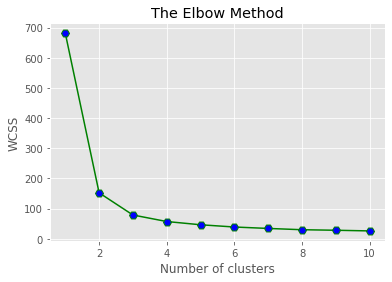

In [10]:
plt.plot(list(sum_square.keys()),
         list(sum_square.values()) ,
         linestyle='-',    
         marker='H',        
         color='g',        
         markersize = 8,   
         markerfacecolor='b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

You can clearly see why it is called 'The Elbow Method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **'3'**.

In [11]:
# Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

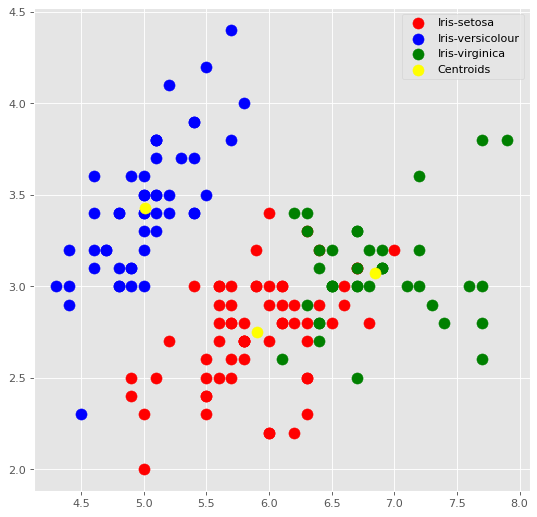

In [15]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

**This concludes our predicting the optimum number of clusters of Iris dataset and representing it visually using KMeans Algorithm.**